In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:,[3,4]].values
print(dataset)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [36]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

c:\Users\Hariprasath\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


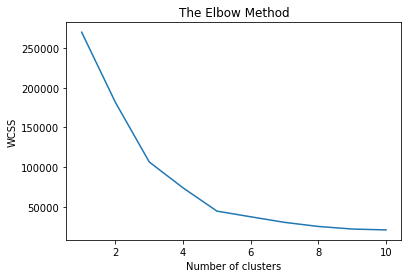

In [4]:
from sklearn.cluster import KMeans
wcss =[]
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the graph to visualize the Elbow Method to find the optimal number of cluster  
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
kmeans=KMeans(n_clusters= 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [6]:
type(y_kmeans)

numpy.ndarray

In [7]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

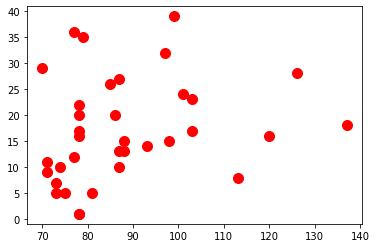

In [8]:

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')

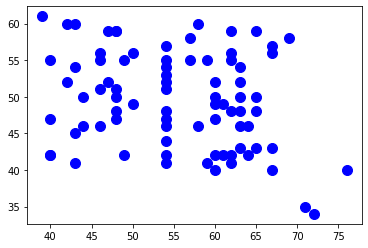

In [10]:
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

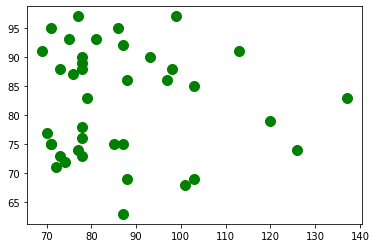

In [11]:
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

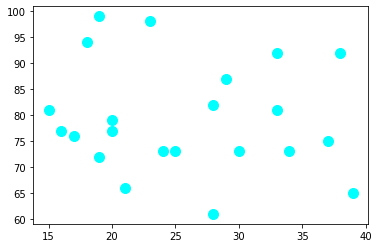

In [12]:
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

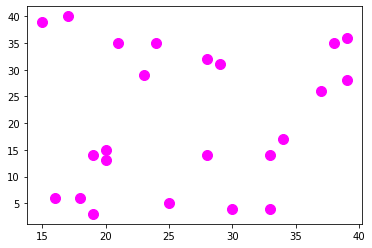

In [13]:
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

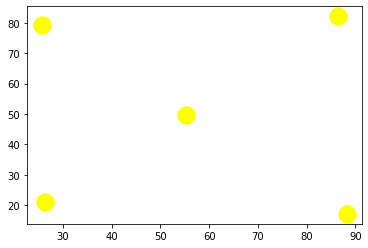

In [14]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

No handles with labels found to put in legend.


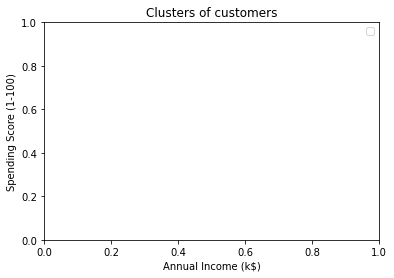

In [15]:
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

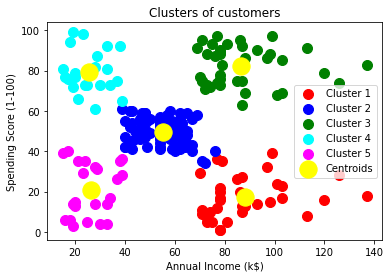

In [16]:

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [18]:
data = pd.read_csv('Kmeans.csv')
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
Species = list(set(data['Species']))
Specie1 = data[data['Species']==Species[0]]
Specie2 = data[data['Species']==Species[1]]
Specie3 = data[data['Species']==Species[2]]

Text(0.5, 1.0, 'Different Species Visualization')

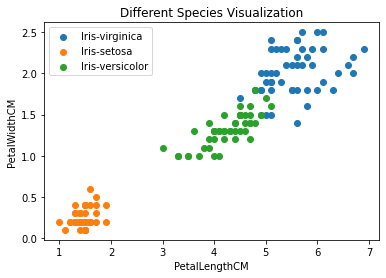

In [20]:
import matplotlib.pyplot as plt
plt.scatter(Specie1['PetalLengthCm'], Specie1['PetalWidthCm'], label=Species[0])
plt.scatter(Specie2['PetalLengthCm'], Specie2['PetalWidthCm'], label=Species[1])
plt.scatter(Specie3['PetalLengthCm'], Specie3['PetalWidthCm'], label=Species[2])
plt.xlabel('PetalLengthCM')
plt.ylabel('PetalWidthCM')
plt.legend()
plt.title('Different Species Visualization')

In [21]:
req_data = data.iloc[:,1:]
req_data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
shuffle_index = np.random.permutation(req_data.shape[0])        #shuffling the row index of our dataset
req_data = req_data.iloc[shuffle_index]
req_data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
69,5.6,2.5,3.9,1.1,Iris-versicolor
109,7.2,3.6,6.1,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica
64,5.6,2.9,3.6,1.3,Iris-versicolor


In [23]:
train_size = int(req_data.shape[0]*0.7)

In [24]:
train_df = req_data.iloc[:train_size,:] 
test_df = req_data.iloc[train_size:,:]
train = train_df.values
test = test_df.values
y_true = test[:,-1]
print('Train_Shape: ',train_df.shape)
print('Test_Shape: ',test_df.shape)

Train_Shape:  (105, 5)
Test_Shape:  (45, 5)


In [25]:
from math import sqrt
def euclidean_distance(x_test, x_train):
    distance = 0
    for i in range(len(x_test)-1):
        distance += (x_test[i]-x_train[i])**2
    return sqrt(distance)

In [26]:
def get_neighbors(x_test, x_train, num_neighbors):
    distances = []
    data = []
    for i in x_train:
        distances.append(euclidean_distance(x_test,i))
        data.append(i)
    distances = np.array(distances)
    data = np.array(data)
    sort_indexes = distances.argsort()             #argsort() function returns indices by sorting distances data in ascending order
    data = data[sort_indexes]                      #modifying our data based on sorted indices, so that we can get the nearest neightbours
    return data[:num_neighbors]   

In [27]:
def prediction(x_test, x_train, num_neighbors):
    classes = []
    neighbors = get_neighbors(x_test, x_train, num_neighbors)
    for i in neighbors:
        classes.append(i[-1])
    predicted = max(classes, key=classes.count)              #taking the most repeated class
    return predicted

In [29]:
def predict_classifier(x_test):
    classes = []
    neighbors = get_neighbors(x_test, req_data.values, 5)
    for i in neighbors:
        classes.append(i[-1])
    predicted = max(classes, key=classes.count)
    print(predicted)
    return predicted

In [30]:
def accuracy(y_true, y_pred):
    num_correct = 0
    for i in range(len(y_true)):
        if y_true[i]==y_pred[i]:
            num_correct+=1
    accuracy = num_correct/len(y_true)
    return accuracy

In [31]:
y_pred = []
for i in test:
    y_pred.append(prediction(i, train, 5))
y_pred

['Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-versicolor']

In [32]:
accuracy = accuracy(y_true, y_pred)

In [33]:
accuracy

1.0

In [34]:
test_df.insert(5, 'Predicted_Species', y_pred, False)

In [35]:
test_df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted_Species
137,6.4,3.1,5.5,1.8,Iris-virginica,Iris-virginica
91,6.1,3.0,4.6,1.4,Iris-versicolor,Iris-versicolor
7,5.0,3.4,1.5,0.2,Iris-setosa,Iris-setosa
18,5.7,3.8,1.7,0.3,Iris-setosa,Iris-setosa
59,5.2,2.7,3.9,1.4,Iris-versicolor,Iris-versicolor
